In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# problem statement

# Data Gathering

In [2]:
df = pd.read_csv('Car Ownership.csv')
df

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1


In [3]:
df['Occupation'][50:100]

50       Financial Analyst
51             Electrician
52         Human Resources
53                 Plumber
54           Social Worker
55          Data Scientist
56                    Chef
57        Customer Service
58            Veterinarian
59        Graphic Designer
60               Architect
61                    Chef
62            Web Designer
63         Insurance Agent
64    Sales Representative
65                Musician
66       Marketing Manager
67       Software Engineer
68                    Chef
69        Dental Hygienist
70          Retail Manager
71                    Chef
72                     NaN
73       Financial Analyst
74             Electrician
75         Human Resources
76                 Plumber
77           Social Worker
78          Data Scientist
79                    Chef
80        Customer Service
81            Veterinarian
82        Graphic Designer
83               Architect
84                    Chef
85            Web Designer
86         Insurance Agent
8

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           490 non-null    object 
 1   Monthly Income       487 non-null    object 
 2   Credit Score         460 non-null    float64
 3   Years of Employment  457 non-null    object 
 4   Finance Status       477 non-null    object 
 5   Finance History      472 non-null    object 
 6   Car                  480 non-null    object 
 7   Number of Children   375 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [5]:
df.isna().sum()/len(df)*100

Occupation              2.0
Monthly Income          2.6
Credit Score            8.0
Years of Employment     8.6
Finance Status          4.6
Finance History         5.6
Car                     4.0
Number of Children     25.0
dtype: float64

In [6]:
df.dtypes

Occupation              object
Monthly Income          object
Credit Score           float64
Years of Employment     object
Finance Status          object
Finance History         object
Car                     object
Number of Children      object
dtype: object

In [7]:
df['Car'].value_counts()/len(df)*100

Yes    60.2
No     35.8
Name: Car, dtype: float64

# feature engineering

# car

In [8]:
df['Car'].isna().sum()

20

In [9]:
df['Car'].fillna(df['Car'].mode()[0],inplace =True)

In [10]:
df['Car'].isna().sum()

0

In [11]:
df['Car'].value_counts().to_dict()
df['Car'].replace({'Yes': 1, 'No': 0},inplace=True)

In [12]:
df['Car'] = df["Car"].astype(int)

# monthly income

In [13]:
df['Monthly Income'] = df['Monthly Income'].astype(str)

In [14]:
import re
df['Monthly Income'] = df['Monthly Income'].apply(lambda x : re.sub('[^0-9]','',x))

In [15]:
df.loc[df['Monthly Income']=='','Monthly Income'] = '0'

In [16]:
df.loc[df['Monthly Income']=='','Monthly Income'] 

Series([], Name: Monthly Income, dtype: object)

In [17]:
df['Monthly Income'] = df['Monthly Income'].astype(int)

In [18]:
df.loc[df['Monthly Income'] == 0,'Monthly Income'] = np.nan

# 'Years of Employment'

In [19]:
df['Years of Employment'].value_counts()

4 years     74
3 years     58
2 years     54
5 years     53
6 years     49
1 year      39
7 years     31
8 years     13
3            9
10           8
1            7
8            7
9 years      6
5            6
2            5
4            4
6            4
10 years     4
12           4
7            3
7 y          2
2 year       2
2 y          2
15           2
20           2
3 year       1
6 year       1
12 years     1
3 y          1
11 years     1
7 year       1
8 year       1
4 year       1
5 year       1
Name: Years of Employment, dtype: int64

In [20]:
df['Years of Employment']= df['Years of Employment'].astype(str)

In [21]:
df['Years of Employment'].value_counts()

4 years     74
3 years     58
2 years     54
5 years     53
6 years     49
nan         43
1 year      39
7 years     31
8 years     13
3            9
10           8
1            7
8            7
9 years      6
5            6
2            5
4            4
6            4
10 years     4
12           4
7            3
7 y          2
2 year       2
2 y          2
15           2
20           2
3 year       1
6 year       1
12 years     1
3 y          1
11 years     1
7 year       1
8 year       1
4 year       1
5 year       1
Name: Years of Employment, dtype: int64

In [22]:
df['Years of Employment']=df['Years of Employment'].apply(lambda x :re.sub('year|years|s|y','',x))

In [23]:
df['Years of Employment']=df['Years of Employment'].apply(lambda x :re.sub('nan','0',x))

In [24]:
df['Years of Employment']=df['Years of Employment'].apply(lambda x :re.sub(' ','',x))

In [25]:
df['Years of Employment'] = df['Years of Employment'].astype(int)

In [26]:
df.loc[df['Years of Employment'] == 0 , 'Years of Employment'] = np.nan

# 'Finance Status'

In [27]:
df['Finance Status'].value_counts()

Stable       304
Unstable      87
Fair          28
Good          26
Excellent     22
Poor           8
Unknow         1
Unkonw         1
Name: Finance Status, dtype: int64

In [28]:
df['Finance Status'].replace({'Unknow':'Unknown',
                            'Unkonw':'Unknown'},inplace= True)

In [29]:
df['Finance Status'].value_counts().to_dict()

{'Stable': 304,
 'Unstable': 87,
 'Fair': 28,
 'Good': 26,
 'Excellent': 22,
 'Poor': 8,
 'Unknown': 2}

In [30]:

df['Finance Status'].replace({'Stable': 4,
 'Unstable': 1,
 'Fair': 2,
 'Good': 3,
 'Excellent': 5,
 'Poor': 0,
 'Unknown': 6,},inplace=True)

# 'Finance History'

In [31]:
df['Finance History'].value_counts().to_dict()

{'No significant issues': 313,
 'Missed payments in the past': 52,
 'Late payments': 31,
 'Late payments, collections': 17,
 'No issues': 12,
 'Poor': 12,
 'Excellent': 10,
 'Good': 8,
 'Fair': 6,
 'Late payment 2 months ago': 2,
 'Late payment 6 months ago': 2,
 'Late payment 3 months ago': 2,
 'Late payment 1 month ago': 2,
 'Late payment': 1,
 'No significant issue': 1,
 'Missed payments, collections, charge-offs': 1}

In [32]:
df['Finance History'].isna().sum()

28

In [33]:
df['Finance History'].fillna(df['Finance History'].mode()[0],inplace=True)

In [34]:
df['Finance History'].isna().sum()

0

In [35]:
df['Finance History'].replace({'No significant issues':'Good' ,
                             'Missed payments in the past':'Poor',
                             'Late payments':'Poor',
                             'Late payments, collections': 'Fair',
                             'No issues': 'Excellent',
#                              'Poor':'Poor',
#                              'Excellent':'Excellent',
#                              'Good': 'Good',
#                              'Fair': 'Fair',
                             'Late payment 2 months ago': 'Fair',
                             'Late payment 6 months ago': 'Fair',
                             'Late payment 3 months ago': 'Fair',
                             'Late payment 1 month ago':  'Fair',
                             'Late payment': 'Poor',
                             'No significant issue': 'Good',
                             'Missed payments, collections, charge-offs': 'Fair'},inplace = True )

In [36]:
df['Finance History'].value_counts().to_dict()

{'Good': 350, 'Poor': 96, 'Fair': 32, 'Excellent': 22}

In [37]:
df['Finance History'].replace({'Good': 3, 'Poor': 0, 'Fair': 1, 'Excellent': 4},inplace = True)

# Occupation

In [38]:
df['Occupation'].isna().sum()

10

In [39]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace =True)

In [40]:
df['Occupation'].isna().sum()

0

In [41]:
np.sort(df['Occupation'].unique()).tolist()

['Account Executive',
 'Account Manager',
 'Accountant',
 'Architect',
 'Art Director',
 'Attorney',
 'Automotive Mechanic',
 'Bank Teller',
 'Barista',
 'Bartender',
 'Business Analyst',
 'Business Owner',
 'Businessman',
 'Carpenter',
 'Chef',
 'Civil Engineer',
 'Computer Programmer',
 'Computer Technician',
 'Construction Worker',
 'Copywriter',
 'Customer Service',
 'Customer Service Rep',
 'Customer Support',
 'Data Analyst',
 'Data Scientist',
 'Dental Assistant',
 'Dental Hygienist',
 'Dentist',
 'Designer',
 'Doctor',
 'Electrical Engineer',
 'Electrician',
 'Elementary School Teacher',
 'Engineer',
 'Entrepreneur',
 'Event Planner',
 'Executive Assistant',
 'Fashion Designer',
 'Financial Advisor',
 'Financial Analyst',
 'Financial Manager',
 'Financial Planner',
 'Fitness Instructor',
 'Flight Attendant',
 'Graphic Artist',
 'Graphic Design',
 'Graphic Designer',
 'HR Generalist',
 'HR Manager',
 'HR Specialist',
 'Hair Stylist',
 'Hairdresser',
 'Human Resources',
 'Human R

In [42]:
df = pd.get_dummies(df,columns =['Occupation'])
df

,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children,Occupation_Account Executive,Occupation_Account Manager,Occupation_Accountant,...,Occupation_Software Dev,Occupation_Software Developer,Occupation_Software Engineer,Occupation_Teacher,Occupation_Veterinarian,Occupation_Veterinarian Technician,Occupation_Waiter/Waitress,Occupation_Web Designer,Occupation_Web Developer,Occupation_Writer
0,40000.0,750.0,10.0,3.0,4,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,60000.0,800.0,8.0,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25000.0,650.0,5.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80000.0,900.0,12.0,5.0,4,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000.0,700.0,15.0,3.0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7000.0,730.0,5.0,4.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4500.0,680.0,4.0,4.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,5500.0,690.0,4.0,4.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,3500.0,640.0,3.0,4.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 'Number of Children' 

In [43]:
df['Number of Children'].value_counts()

0     120
1     112
2      95
na     29
3      18
4       1
Name: Number of Children, dtype: int64

In [44]:
df['Number of Children'].value_counts()

0     120
1     112
2      95
na     29
3      18
4       1
Name: Number of Children, dtype: int64

In [45]:
df.loc[df['Number of Children'] == 'na','Number of Children'] = 500

In [46]:
df['Number of Children'] = df['Number of Children'].astype(str)

In [47]:
df.loc[df['Number of Children'] == 'nan','Number of Children'] = '500'

In [48]:
df['Number of Children'] = df['Number of Children'].astype(int)

In [49]:
df.loc[df['Number of Children'] == 500,'Number of Children'] = np.nan

In [50]:
df['Number of Children'].isnull().sum()

154

In [51]:
df.select_dtypes(object)

""
0
1
2
3
4
...
495
496
497
498


# filling remaining missingvalues with knnimputer

In [52]:
impute = KNNImputer()
arr = impute.fit_transform(df)
df = pd.DataFrame(arr,columns = df.columns)

In [53]:
df.isna().sum()[0:25]

Monthly Income                    0
Credit Score                      0
Years of Employment               0
Finance Status                    0
Finance History                   0
Car                               0
Number of Children                0
Occupation_Account Executive      0
Occupation_Account Manager        0
Occupation_Accountant             0
Occupation_Architect              0
Occupation_Art Director           0
Occupation_Attorney               0
Occupation_Automotive Mechanic    0
Occupation_Bank Teller            0
Occupation_Barista                0
Occupation_Bartender              0
Occupation_Business Analyst       0
Occupation_Business Owner         0
Occupation_Businessman            0
Occupation_Carpenter              0
Occupation_Chef                   0
Occupation_Civil Engineer         0
Occupation_Computer Programmer    0
Occupation_Computer Technician    0
dtype: int64

In [54]:
df.dtypes.tail(20)

Occupation_Real Estate Agent          float64
Occupation_Registered Nurse           float64
Occupation_Retail Manager             float64
Occupation_Retail Salesperson         float64
Occupation_Sales Manager              float64
Occupation_Sales Representative       float64
Occupation_Salesperson                float64
Occupation_Social Media Manager       float64
Occupation_Social Worker              float64
Occupation_Software Architect         float64
Occupation_Software Dev               float64
Occupation_Software Developer         float64
Occupation_Software Engineer          float64
Occupation_Teacher                    float64
Occupation_Veterinarian               float64
Occupation_Veterinarian Technician    float64
Occupation_Waiter/Waitress            float64
Occupation_Web Designer               float64
Occupation_Web Developer              float64
Occupation_Writer                     float64
dtype: object

In [55]:
df.columns

Index(['Monthly Income', 'Credit Score', 'Years of Employment',
       'Finance Status', 'Finance History', 'Car', 'Number of Children',
       'Occupation_Account Executive', 'Occupation_Account Manager',
       'Occupation_Accountant',
       ...
       'Occupation_Software Dev', 'Occupation_Software Developer',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'Occupation_Veterinarian', 'Occupation_Veterinarian Technician',
       'Occupation_Waiter/Waitress', 'Occupation_Web Designer',
       'Occupation_Web Developer', 'Occupation_Writer'],
      dtype='object', length=123)

In [56]:
df.select_dtypes(object)

""
0
1
2
3
4
...
495
496
497
498


# outliers detection

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


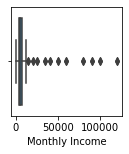

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


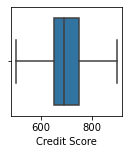

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


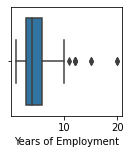

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


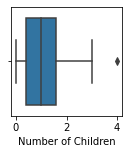

In [57]:
df1 = df[['Monthly Income', 'Credit Score', 'Years of Employment','Number of Children']]
for i in df1.columns:
    plt.figure(figsize= (2,2))
    sns.boxplot(df1[i])
    plt.show()

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


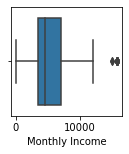

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


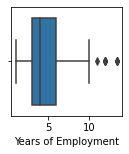

In [58]:
df2 = df[["Monthly Income","Years of Employment"]]

for i in df2.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr = q3-q1
    lt=q1-2.5*iqr
    ut=q3+2.5*iqr
    
    df.loc[df[i]<lt,i] = lt
    df.loc[df[i]>ut,i] = ut
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()

In [59]:
 df['Car'].value_counts()/len(df)*100

1.0    64.2
0.0    35.8
Name: Car, dtype: float64

In [60]:
len(df.columns)

123

In [61]:
corr = df.corr()[4:5]
corr[0:10]

,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children,Occupation_Account Executive,Occupation_Account Manager,Occupation_Accountant,...,Occupation_Software Dev,Occupation_Software Developer,Occupation_Software Engineer,Occupation_Teacher,Occupation_Veterinarian,Occupation_Veterinarian Technician,Occupation_Waiter/Waitress,Occupation_Web Designer,Occupation_Web Developer,Occupation_Writer
Finance History,0.427062,0.658238,0.616838,0.833568,1.0,0.700396,-0.013759,0.046969,0.040635,0.035224,...,0.033145,0.052565,0.062322,0.074717,0.066693,-0.083012,-0.083012,0.066693,0.066693,-0.131846


# pca

In [62]:
from sklearn.decomposition import PCA

In [63]:
x = df.drop('Car',axis = 1)
y = df['Car']

In [64]:
pca = PCA(n_components=25)
arr = pca.fit_transform(x)

In [65]:
t1 = list('p'*25)
t2 = list('c'*25)
t3 = list(range(1,26))
pca_list = []
for i in range (0,25):
    t = t1[i]+t2[i]+str(t3[i])
    pca_list.append(t)
    
x_pca = pd.DataFrame(arr,columns=pca_list)   
x_pca


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25
0,10213.841452,101.275215,-1.123558,1.575298,0.154454,-1.000521,0.073031,-0.006501,0.069904,-0.137438,...,-0.332686,-0.073657,0.022756,0.000195,0.071161,-0.049720,-0.048302,-0.002819,-0.002141,-0.079810
1,10214.575523,51.350401,0.562757,-1.475905,0.116890,-0.949227,0.138164,0.103771,0.107212,-0.128456,...,-0.001676,0.059682,0.030483,-0.051780,-0.325630,-0.302375,-0.148101,-0.161064,0.489401,-0.116802
2,10212.367011,201.389318,0.235631,-1.347441,-0.619821,0.760907,-0.131785,-0.138136,-0.316889,0.750921,...,0.049780,0.022924,-0.008467,0.061316,0.059546,0.023483,-0.017379,0.022506,-0.041338,-0.004248
3,10216.048957,-48.717035,0.708937,0.934543,1.299146,0.217385,0.057987,0.035843,0.136399,-0.022937,...,0.050386,0.044523,0.047166,-0.102100,0.075618,0.066416,0.033154,-0.066022,-0.207818,0.060959
4,10213.107760,151.204748,-1.326440,6.101854,-1.391409,1.235106,-0.110890,-0.096974,0.081688,-0.028400,...,0.129267,0.099375,0.032357,0.079472,-0.060733,0.037330,0.028591,-0.142991,0.039725,0.042293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1464.492277,-7.404354,-0.469393,-0.938955,-0.733923,0.162684,-0.011877,0.017355,-0.038272,-0.036328,...,-0.004636,0.007394,-0.019859,-0.007146,0.007741,0.003029,-0.012925,0.003634,0.000924,0.056606
496,-1035.972788,5.796171,-1.406313,-0.301637,-0.771661,0.103414,0.938621,0.069218,-0.025262,0.044768,...,0.021037,0.004597,-0.024264,0.002426,0.026195,-0.000976,-0.012036,0.004757,0.005917,0.026845
497,-35.934029,10.517978,-1.106234,-0.378147,0.246041,-0.018371,-0.065677,-0.023396,-0.038660,-0.061694,...,0.005138,0.002461,-0.008431,-0.020376,-0.032536,0.016535,0.028655,0.007412,0.000689,0.053279
498,-2036.453257,31.076703,-2.060217,0.113652,0.213063,-0.119542,-0.101766,-0.054886,-0.071931,-0.071147,...,0.000965,0.002036,-0.012690,0.001191,-0.074622,0.015925,0.041389,-0.003235,0.029289,0.068898


In [66]:
y.value_counts()/len(y)*100

1.0    64.2
0.0    35.8
Name: Car, dtype: float64

In [67]:
# unbalance data so sampling is required

# sampling

In [68]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [69]:
sample = SMOTE(sampling_strategy=0.95)
x_re,y_re = sample.fit_resample(x_pca,y)

# model training

In [70]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x_re,y_re,stratify=y_re,train_size=0.7,random_state=45)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((437, 25), (188, 25), (437,), (188,))

In [72]:
y_re.value_counts()/len(y_re)*100

1.0    51.36
0.0    48.64
Name: Car, dtype: float64

# logistic regressiion

In [73]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\anacondaaa\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# model eval

In [74]:
def model_eval ( x,y,model):
    y_pred = model.predict(x)
    cm = confusion_matrix(y,y_pred)
    print(f'CONFUSION MATRIX = \n{cm}')
    print('*'*25)
    cr = classification_report(y,y_pred)
    print(f'CLASSIFICATION REPORT = \n{cr}')
    print('*'*25)
    acc = accuracy_score(y,y_pred)
    print(f'ACCURACY SCORE = \n{acc}')
    print('*'*25)
    

# traing accuracy

In [75]:
model_eval(x_train,y_train,lr)

CONFUSION MATRIX = 
[[191  22]
 [ 22 202]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       213
         1.0       0.90      0.90      0.90       224

    accuracy                           0.90       437
   macro avg       0.90      0.90      0.90       437
weighted avg       0.90      0.90      0.90       437

*************************
ACCURACY SCORE = 
0.8993135011441648
*************************


# testing

In [76]:
model_eval(x_test,y_test,lr)

CONFUSION MATRIX = 
[[81 10]
 [ 9 88]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90        91
         1.0       0.90      0.91      0.90        97

    accuracy                           0.90       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.90      0.90       188

*************************
ACCURACY SCORE = 
0.898936170212766
*************************


# DTree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier(random_state=45)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

# training accuracy

In [79]:
model_eval(x_train,y_train,dt)

CONFUSION MATRIX = 
[[213   0]
 [  0 224]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       213
         1.0       1.00      1.00      1.00       224

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

*************************
ACCURACY SCORE = 
1.0
*************************


# testing 

In [80]:
model_eval(x_test,y_test,dt)

CONFUSION MATRIX = 
[[84  7]
 [ 9 88]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        91
         1.0       0.93      0.91      0.92        97

    accuracy                           0.91       188
   macro avg       0.91      0.92      0.91       188
weighted avg       0.92      0.91      0.91       188

*************************
ACCURACY SCORE = 
0.9148936170212766
*************************


# Hyperparameter tunning

In [81]:
dt = DecisionTreeClassifier(random_state=45)
hyp = {'criterion':['gini','entropy'],
        'max_depth':np.arange(3,10),
        'min_samples_split':np.arange(2,10),
        'min_samples_leaf':np.arange(3,10),
      }

rscv = RandomizedSearchCV(dt,hyp)
rscv.fit(x_train,y_train)
rscv.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       random_state=45)

In [82]:
dt = rscv.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       random_state=45)

# model eval

In [83]:
# training accuracy 

model_eval(x_train,y_train,dt)

CONFUSION MATRIX = 
[[207   6]
 [ 12 212]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       213
         1.0       0.97      0.95      0.96       224

    accuracy                           0.96       437
   macro avg       0.96      0.96      0.96       437
weighted avg       0.96      0.96      0.96       437

*************************
ACCURACY SCORE = 
0.9588100686498856
*************************


In [84]:
# testing accuracy

model_eval(x_test,y_test,dt)

CONFUSION MATRIX = 
[[82  9]
 [14 83]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88        91
         1.0       0.90      0.86      0.88        97

    accuracy                           0.88       188
   macro avg       0.88      0.88      0.88       188
weighted avg       0.88      0.88      0.88       188

*************************
ACCURACY SCORE = 
0.8776595744680851
*************************


# Randomforest

In [85]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [86]:
rf = RandomForestClassifier(random_state=45)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=45)

# model eval

In [87]:
# training accuracy
model_eval(x_train,y_train,rf)

CONFUSION MATRIX = 
[[213   0]
 [  0 224]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       213
         1.0       1.00      1.00      1.00       224

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

*************************
ACCURACY SCORE = 
1.0
*************************


In [88]:
# testing accuracy
model_eval(x_test,y_test,rf)

CONFUSION MATRIX = 
[[88  3]
 [ 5 92]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        91
         1.0       0.97      0.95      0.96        97

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

*************************
ACCURACY SCORE = 
0.9574468085106383
*************************


# Hyperparameter tunning

In [89]:
rf2 = RandomForestClassifier(random_state=45)
hype = {"criterion":['gini','entropy'],
       "max_depth":np.arange(2,10),
       "min_samples_leaf": np.arange(3,10),
       "min_samples_split":np.arange(2,20),
       "n_estimators":np.arange(50,100)}
rscv = RandomizedSearchCV(rf2,hype)
rscv.fit(x_train,y_train)
rscv.best_estimator_
rf2 = rscv.best_estimator_
rf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=15,
                       n_estimators=54, random_state=45)

# model evaluation

In [90]:
# traing accuracy

model_eval(x_train,y_train,rf2)

CONFUSION MATRIX = 
[[203  10]
 [  9 215]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       213
         1.0       0.96      0.96      0.96       224

    accuracy                           0.96       437
   macro avg       0.96      0.96      0.96       437
weighted avg       0.96      0.96      0.96       437

*************************
ACCURACY SCORE = 
0.9565217391304348
*************************


In [91]:
# testing accuracy

model_eval(x_test,y_test,rf2)

CONFUSION MATRIX = 
[[80 11]
 [10 87]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        91
         1.0       0.89      0.90      0.89        97

    accuracy                           0.89       188
   macro avg       0.89      0.89      0.89       188
weighted avg       0.89      0.89      0.89       188

*************************
ACCURACY SCORE = 
0.8882978723404256
*************************


In [92]:
arrr=rf.feature_importances_
arrr

array([0.21765669, 0.13688135, 0.0529852 , 0.01946531, 0.01480087,
       0.01588268, 0.0632249 , 0.04032145, 0.01848783, 0.01858795,
       0.0932584 , 0.023145  , 0.02806329, 0.05679894, 0.01358936,
       0.02917517, 0.01798495, 0.01692092, 0.02823581, 0.02518351,
       0.0127407 , 0.01276732, 0.01645141, 0.01378596, 0.01360503])

In [93]:
s = pd.Series(arrr,index=pca_list)
s.sort_values()

pc21    0.012741
pc22    0.012767
pc15    0.013589
pc25    0.013605
pc24    0.013786
pc5     0.014801
pc6     0.015883
pc23    0.016451
pc18    0.016921
pc17    0.017985
pc9     0.018488
pc10    0.018588
pc4     0.019465
pc12    0.023145
pc20    0.025184
pc13    0.028063
pc19    0.028236
pc16    0.029175
pc8     0.040321
pc3     0.052985
pc14    0.056799
pc7     0.063225
pc11    0.093258
pc2     0.136881
pc1     0.217657
dtype: float64

# Ada boost

In [94]:
ada = AdaBoostClassifier(random_state=45)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=45)

# model eval

In [95]:
# training accuracy 

model_eval(x_train,y_train,ada)

CONFUSION MATRIX = 
[[213   0]
 [  0 224]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       213
         1.0       1.00      1.00      1.00       224

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

*************************
ACCURACY SCORE = 
1.0
*************************


In [96]:
# testing accuracy 

model_eval(x_test,y_test,ada)

CONFUSION MATRIX = 
[[84  7]
 [ 6 91]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93        91
         1.0       0.93      0.94      0.93        97

    accuracy                           0.93       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

*************************
ACCURACY SCORE = 
0.9308510638297872
*************************


# HYperparameter tunning

In [97]:
ada1 = AdaBoostClassifier(random_state  = 45)
hype = {"n_estimators":np.arange(50,100),
       "learning_rate":np.arange(0.1,1.1,0.1)}
rscv = RandomizedSearchCV(ada1,hype)
rscv.fit(x_train,y_train)
rscv.best_estimator_
ada2 = rscv.best_estimator_
ada2.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=57, random_state=45)

# model eval

In [98]:
# training accuracy

model_eval(x_train,y_train,ada2)

CONFUSION MATRIX = 
[[207   6]
 [  6 218]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       213
         1.0       0.97      0.97      0.97       224

    accuracy                           0.97       437
   macro avg       0.97      0.97      0.97       437
weighted avg       0.97      0.97      0.97       437

*************************
ACCURACY SCORE = 
0.9725400457665904
*************************


In [99]:
# testing accuracy

model_eval(x_test,y_test,ada2)

CONFUSION MATRIX = 
[[83  8]
 [ 6 91]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        91
         1.0       0.92      0.94      0.93        97

    accuracy                           0.93       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

*************************
ACCURACY SCORE = 
0.925531914893617
*************************


In [100]:
arrr=ada2.feature_importances_
s = pd.Series(arrr,index=pca_list)
s.sort_values()

pc18    0.000000
pc9     0.000000
pc17    0.000000
pc12    0.000000
pc14    0.000000
pc23    0.017544
pc22    0.017544
pc21    0.017544
pc5     0.017544
pc10    0.017544
pc24    0.017544
pc20    0.035088
pc19    0.035088
pc13    0.052632
pc25    0.052632
pc8     0.052632
pc4     0.052632
pc15    0.052632
pc16    0.070175
pc11    0.070175
pc6     0.070175
pc3     0.070175
pc2     0.070175
pc1     0.070175
pc7     0.140351
dtype: float64

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [102]:
scale = MinMaxScaler()
arr=scale.fit_transform(x_pca)
x_norms = pd.DataFrame(arr,columns = x_pca.columns)
x_norms

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25
0,0.999860,0.667588,0.266180,0.460457,0.389945,0.239176,0.394888,0.273243,0.379567,0.072896,...,0.047633,0.335084,0.442237,0.494749,0.468005,0.256338,0.338953,0.289760,0.452142,0.361887
1,0.999906,0.557069,0.533836,0.096769,0.383398,0.247827,0.440421,0.359365,0.408358,0.080720,...,0.337356,0.443745,0.448145,0.446622,0.070205,0.045590,0.260028,0.157793,0.890331,0.321330
2,0.999766,0.889212,0.481914,0.112081,0.254998,0.536279,0.251706,0.170436,0.081081,0.846756,...,0.382394,0.413790,0.418363,0.551345,0.456361,0.317399,0.363408,0.310880,0.417199,0.444732
3,1.000000,0.335549,0.557038,0.384082,0.589453,0.444602,0.384372,0.306314,0.430881,0.172639,...,0.382925,0.431392,0.460903,0.400027,0.472474,0.353211,0.403372,0.237052,0.268790,0.516223
4,0.999813,0.778118,0.233978,1.000000,0.120518,0.616263,0.266314,0.202583,0.388661,0.167880,...,0.451966,0.476091,0.449578,0.568157,0.335776,0.328950,0.399763,0.172865,0.489464,0.495757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.444203,0.427003,0.370010,0.160771,0.235111,0.435375,0.335531,0.291874,0.296088,0.160974,...,0.334766,0.401134,0.409651,0.487951,0.404424,0.300337,0.366931,0.295141,0.454874,0.511450
496,0.285402,0.456225,0.221300,0.236736,0.228533,0.425378,1.000000,0.332380,0.306128,0.231617,...,0.357236,0.398855,0.406284,0.496815,0.422925,0.296997,0.367634,0.296078,0.459325,0.478820
497,0.348913,0.466678,0.268929,0.227616,0.405908,0.404836,0.297921,0.260048,0.295790,0.138877,...,0.343320,0.397114,0.418390,0.475701,0.364044,0.311603,0.399814,0.298292,0.454665,0.507802
498,0.221863,0.512189,0.117511,0.286236,0.400160,0.387772,0.272692,0.235454,0.270114,0.130643,...,0.339668,0.396768,0.415133,0.495671,0.321852,0.311095,0.409884,0.289413,0.480160,0.524926


# model training

In [103]:
xnorm_train,xnorm_test,y_train1,y_test1 = train_test_split(x_norms,y,random_state=45,train_size=0.7,stratify=y)

In [104]:
knn = KNeighborsClassifier()
knn.fit(xnorm_train,y_train1)

KNeighborsClassifier()

# model eval

In [105]:
# training accuracy

model_eval(xnorm_train,y_train1,knn)

CONFUSION MATRIX = 
[[104  21]
 [  8 217]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       125
         1.0       0.91      0.96      0.94       225

    accuracy                           0.92       350
   macro avg       0.92      0.90      0.91       350
weighted avg       0.92      0.92      0.92       350

*************************
ACCURACY SCORE = 
0.9171428571428571
*************************


In [106]:
# testing accuracy

model_eval(xnorm_test,y_test1,knn)

CONFUSION MATRIX = 
[[41 13]
 [ 3 93]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84        54
         1.0       0.88      0.97      0.92        96

    accuracy                           0.89       150
   macro avg       0.90      0.86      0.88       150
weighted avg       0.90      0.89      0.89       150

*************************
ACCURACY SCORE = 
0.8933333333333333
*************************


# Hyperparameter tunning

In [107]:
knn1 = KNeighborsClassifier()
hype = {'n_neighbors':np.arange(5,25),'p':[1,2]}
rscv = RandomizedSearchCV(knn1,hype)
rscv.fit(xnorm_train,y_train1)
rscv.best_estimator_
knn2 = rscv.best_estimator_
knn2.fit(xnorm_train,y_train1)

KNeighborsClassifier(n_neighbors=19, p=1)

# model eval

In [108]:
# training accuracy 

model_eval(xnorm_train,y_train1,knn2)

CONFUSION MATRIX = 
[[ 89  36]
 [ 10 215]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79       125
         1.0       0.86      0.96      0.90       225

    accuracy                           0.87       350
   macro avg       0.88      0.83      0.85       350
weighted avg       0.87      0.87      0.86       350

*************************
ACCURACY SCORE = 
0.8685714285714285
*************************


In [109]:
# testing accuracy 

model_eval(xnorm_test,y_test1,knn2)

CONFUSION MATRIX = 
[[40 14]
 [ 2 94]]
*************************
CLASSIFICATION REPORT = 
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83        54
         1.0       0.87      0.98      0.92        96

    accuracy                           0.89       150
   macro avg       0.91      0.86      0.88       150
weighted avg       0.90      0.89      0.89       150

*************************
ACCURACY SCORE = 
0.8933333333333333
*************************


# user Defined function

In [110]:
import json
project_data = {'columns':x.columns.to_numpy().tolist(),
                'Finance Status':{'Stable': 4,
                                 'Unstable': 1,
                                 'Fair': 2,
                                 'Good': 3,
                                 'Excellent': 5,
                                 'Poor': 0,
                                 'Unknown': 6},
                'Finance History':{'Good': 3, 
                                   'Poor': 0, 
                                   'Fair': 1, 
                                   'Excellent': 4}
               }
with open ('project_data.json','w') as file:
    json.dump(project_data,file)

In [111]:
import pickle

with open('model_rf.pkl','wb') as file:
    pickle.dump(rf2,file)
    
    
    

In [112]:
with open('pca.pkl','wb') as file:
    pickle.dump(pca,file)

In [113]:
df

,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children,Occupation_Account Executive,Occupation_Account Manager,Occupation_Accountant,...,Occupation_Software Dev,Occupation_Software Developer,Occupation_Software Engineer,Occupation_Teacher,Occupation_Veterinarian,Occupation_Veterinarian Technician,Occupation_Waiter/Waitress,Occupation_Web Designer,Occupation_Web Developer,Occupation_Writer
0,15750.0,750.0,10.0,3.0,4.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15750.0,800.0,8.0,3.0,4.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15750.0,650.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15750.0,900.0,12.0,5.0,4.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15750.0,700.0,13.5,3.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7000.0,730.0,5.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,4500.0,680.0,4.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,5500.0,690.0,4.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,3500.0,640.0,3.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
user_data = np.zeros(len(x.columns.tolist()))

Monthly_Income = eval(input('Monthly_Income:'))
Credit_Score = eval(input('Credit_Score:'))
Years_of_Employment = eval(input('Years_of_Employment:'))
Finance_Status = eval(input('Finance_Status:'))
Number_of_Children = int(input('Number_of_Children:'))
Occupation = eval(input('Occupation:'))
Finance_History = eval(input('Finance_History:'))

user_data[0] = Monthly_Income
user_data[1] = Credit_Score
user_data[2] = Years_of_Employment
user_data[3] = project_data['Finance Status'][Finance_Status]
user_data[4] = Number_of_Children
user_data[5] = project_data['Finance History'][Finance_History]
occupation = 'Occupation_'+Occupation
index1 = project_data['columns'].index(occupation)           ## list method
user_data[index1] = 1



pca_trans = pca.transform([user_data])
result = rf2.predict(pca_trans)
result[0]

Monthly_Income:8000
Credit_Score:640
Years_of_Employment:1
Finance_Status:'Fair'
Number_of_Children:0
Occupation:'Data Scientist'
Finance_History:'Good'


C:\anacondaaa\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\anacondaaa\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.0

In [115]:
print(user_data.tolist())

[60000.0, 640.0, 1.4, 2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
